# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [11]:
import numpy as np
from scipy.cluster.hierarchy import linkage,dendrogram
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

**Step 2:** Load the dataset _(done for you)_.

In [12]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    ### BEGIN SOLUTION
    
    df = pd.DataFrame(iris_data.data ,columns=[" ".join(feature.split(" ")[:-1]) for feature in iris_data.feature_names])
    # Add target and class to DataFrame   
    df['target']=iris_data.target
    df['class']=iris_data.target_names[iris_data.target]
    return df
df = create_df()

In [7]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [16]:
#From our data we will only get variable columns as np.array
x = df.values

In [17]:
assert x.shape == (150,4)

AssertionError: 

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [32]:
mergings = linkage(x, method='complete')

In [33]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

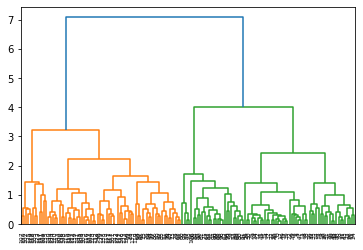

In [36]:
dn = dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)

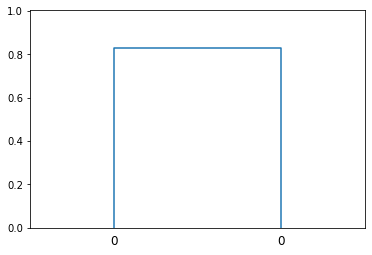

In [37]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [18]:
from sklearn.cluster import KMeans
points = pd.read_csv(r'.\02. Partitional Algorithms\datasets\ch1ex1.csv').values
new_points = pd.read_csv(r'.\02. Partitional Algorithms\datasets\ch1ex2.csv').values

**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [19]:
model = KMeans(n_clusters=4)

In [40]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [20]:
model.fit(points)

KMeans(n_clusters=4)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [21]:
labels = model.predict(points)

In [50]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [22]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = points[labels==0]
    data_1 = points[labels==1]
    data_2 = points[labels==2]
    return data_0,data_1,data_2
data_0,data_1,data_2 = separate_labels(labels, points)

In [56]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

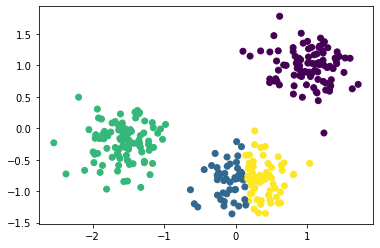

In [23]:
import matplotlib.pyplot as plt
plt.scatter(points[:,0],points[:,1], c=labels)

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [64]:
new_labels = model.predict(new_points)

In [65]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [66]:
#separate the data by labels like we did before
new_0,new_1,new_2 = separate_labels(new_labels, new_points)


In [67]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

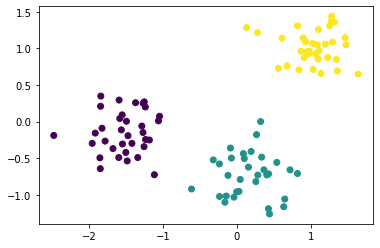

In [68]:
#plot the new labels
plt.scatter(new_points[:,0],new_points[:,1], c=new_labels)

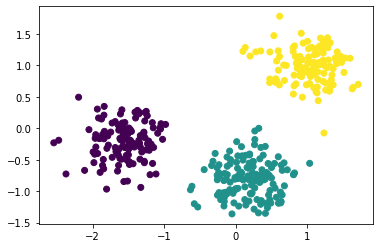

In [71]:
#plot all the points together
plt.scatter(points[:,0],points[:,1], c=labels)
plt.scatter(new_points[:,0],new_points[:,1], c=new_labels)
plt.show()